# EDA of the 1692  Salem Witch Trials
I found this data set on Kaggle, uploaded by Rachel Tatman, who credits Professor Richard Latner of Tulane University for making this material available. There are 8 .csv files providing quantitative data listing names of all 152 accused, focusing on the geographic spread of the outbreak, the socio-economic conditions of the populace, and the chronology of events.



While vetting this data set for my python project, two files in particular caught my eye: <b>a Pro Parris file, and an Anti Parris file.</b> Two petitions signed in 1695, <i>two years after</i> the end of the outbreak. The first was the Anti-Parris Petition, signed by 85 villagers.  Their intent was to strip the local minister, named Samuel Paris of his job and titles.  The responding petition was Pro-Parris, and contained 105 signatures. 

In the year <i>before the outbreak,</i> the villagers decided to stop paying taxes, as the good Rev's wages were drawn from them.  They revoked his title to the parish estate, and refused to attend his services. This was not an unusual tactic for the village, as they had sent four Puritan Ministers packing in similar fashion before Paris ever arrived.  Such was the contentious background of this entire episode of colonial history.

<b>I focused a lot of my time in the Tax Data Set, as this set had gender, church affiliation and tax payments of each villager over the duration of Samuel Parris's tenure, whether they paid taxes or not.</b>

Salem was notoriously cantankerous. There was friction between Salem and the other townships and churches.  The Puritans didn't like Catholics or Quakers, and according to the historical record, Salem Villagers were a litigious group on the whole.

Samuel Paris was the Nexus point of the outbreak. As fate would have it, he was the head of the first household to produce an accusation of witchcraft. Her name was Tituba Indian (1).  An enslaved woman that Samuel purchased while still living in Barbados.  Samuel's children accused her of longtime magical exploits, to which she confessed when 'questioned'.  Her husband, John Indian joined forces with Samuel's children and began accusing other villagers of witchraft.  And it just sort of bloomed outwards from there.  

### It stopped as quickly as it began In October 1692. 

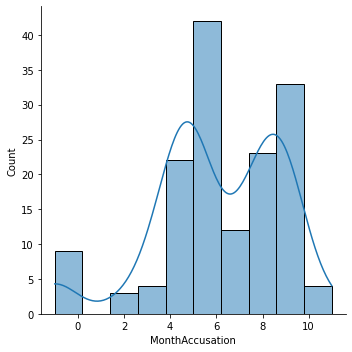

In [13]:
sns.displot(data=Accused, x='MonthAccusation', kde=True)# reveals a bimodal non symetric shape

# Questions I will be exploring
1. What % of the Accused were Executed? 
2. On average, how long from accusation till execution? 
3. Which village had the most, the least accused?
4. Which village had the most, the least executed?
5. Is there a correlation between amount of taxes paid and support of Paris?
6. Is there a correlation between Church affiliation and support or opposition to Paris?
7. What is the profile of a Paris supporter?  Opposer?

# Hypothesis
<p><b>Null Hypothesis:</b> Membership in the Salem Village Church <b>IS</b> a predictor of support for the minister at the centre of the witch trials.</p>
<b>Alternative Hypothesis:</b> Membership in the Salem Village Church is <b>NOT</b> a predictor of support.

(1) a note on Tituba:
The records show Tituba confessed during a beating/torture.
Historical research suggests Tituba was a Kalina (or Caribe) woman, named after her tribe from Tibitó.  Tibito is one of the oldest archeological sites in Colombia, with documented human habitation stretching  as far back as  11,700 years.  She was married to an Indigenous man named John Indian, of which records are few.

# Loading the data

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
#loading colour palette
sns.color_palette("Set2", as_cmap=True)

In [9]:
Accused = pd.read_csv("/Users/sareenah/Desktop/Salem/Accused-Witches-Data-Set.csv")
# replace NaNs (Not a Number's) with the number zero
Accused['MonthExecution'] = Accused['MonthExecution'].fillna(0)  
# specifying number of bins
num_bins = 5

In [10]:
# directory
import os

os.getcwd()

'/Users/sareenah/Desktop/Salem'

In [11]:
# all files
import os
for dirname, _, filenames in os.walk('/Users/sareenah/Desktop/Salem'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

//Salem/Accused-Witches-Data-Set.csv
/Users/sareenah/Desktop/Salem/accused_fig_1.png
/Users/sareenah/Desktop/Salem/accused_fig_3.png
/Users/sareenah/Desktop/Salem/accused_fig_2.png
/Users/sareenah/Desktop/Salem/Untitled1.ipynb
/Users/sareenah/Desktop/Salem/.DS_Store
/Users/sareenah/Desktop/Salem/Salem-Village-Data-Set.csv
/Users/sareenah/Desktop/Salem/index.png
/Users/sareenah/Desktop/Salem/Untitled.ipynb
/Users/sareenah/Desktop/Salem/towns_cleaning.ipynb
/Users/sareenah/Desktop/Salem/Committee-Yearly-Data-Set.csv
/Users/sareenah/Desktop/Salem/Salem - Figures.ipynb
/Users/sareenah/Desktop/Salem/Pro-Parris-Social-Data-Set.csv
/Users/sareenah/Desktop/Salem/Towns-Data-Set.csv
/Users/sareenah/Desktop/Salem/Accused-Witches-Data-Set1.csv
/Users/sareenah/Desktop/Salem/Anti-Parris-Social-Data-Set.csv
/Users/sareenah/Desktop/Salem/the_executed_fig_1.png
/Users/sareenah/Desktop/Salem/salemNotebook.ipynb
/Users/sareenah/Desktop/Salem/Tax-Comparison-Data-Set.csv
/Users/sareenah/Desktop/Salem/Commi

In [12]:
# loading files
accused = pd.read_csv('./Accused-Witches-Data-Set.csv')
towns = pd.read_csv('./Towns-Data-Set.csv')
village = pd.read_csv('./Salem-Village-Data-Set.csv')
committeeL = pd.read_csv('./Committee-List-Data-Set.csv')
committeeY = pd.read_csv('./Committee-Yearly-Data-Set.csv')
taxC = pd.read_csv('./Tax-Comparison-Data-Set.csv')
proParis = pd.read_csv('./Pro-Parris-Social-Data-Set.csv')
antiParis = pd.read_csv('./Anti-Parris-Social-Data-Set.csv')

# Reviewing the data

In [ ]:
print(accused.head())
print(village.head())
print(towns.head())
print(committeeL.head())
print(committeeY.head())
print(taxC.head())
print(proParis.head())
print(antiParis.head())

# The Accused 

The accused data set contains 152 records of accused witches. 
It includes their names, town or village they were from, the month of the accusation brought against them and month of any executions that occurred. Oddly enough, if does not contain gender information for the accused. A scan through the names reveals traditional names of both men, and women.

### Cleaning
NaNs in this data set simply mean there was no recorded accusation in the town bin for the month in question

In [24]:
df = pd.read_csv('./Accused-Witches-Data-Set.csv', sep=',')

In [25]:
#df.head(10)

I used the fillna method to replace the NaNs with 0. This way I can count up the numbers of accused vs executed for further analysis and visualization.

In [26]:
#replacing Nan values with numeric 0
df['MonthExecution'] = df['MonthExecution'].fillna(0)

### Measures of Tendancies

In [27]:
df.describe()

,MonthAccusation,MonthExecution,Sort
count,152.000000,152.000000,152.000000
mean,6.039474,1.065789,76.500000
std,2.752197,2.768486,44.022721
min,-1.000000,0.000000,1.000000
25%,4.750000,0.000000,38.750000
50%,5.000000,0.000000,76.500000
75%,8.000000,0.000000,114.250000
max,11.000000,9.000000,152.000000


In [18]:
#df.head(10)  #to check that all NaN's were replaced

## The outbreak 
had a swift spring beginning and a sudden autumn ending.
This was an intense, and rapid event that played out over a 10 month period.
It directly affected 152 individuals, leaving 20 people (17% of the accused) dead.
The histogram shows a bimodal pattern. Two periods of increased activity dropping dramaticly in June, and completely in October. 

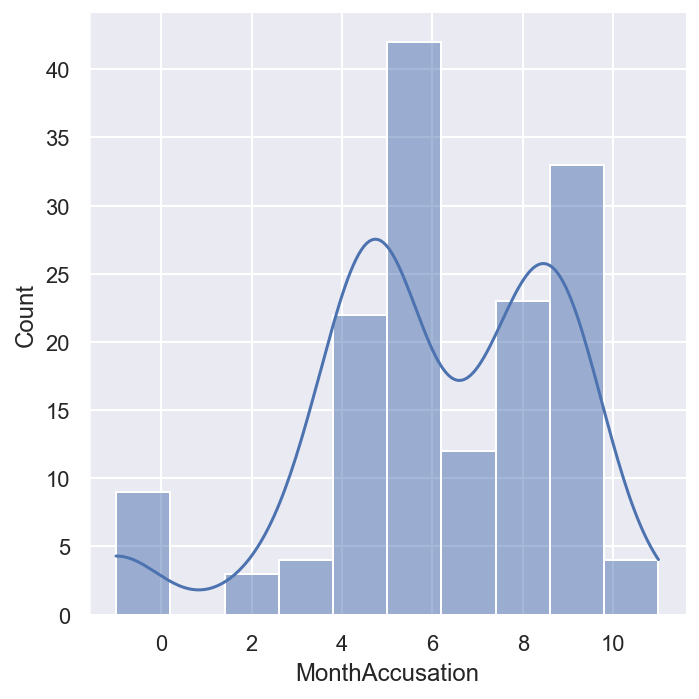

## The Executed
The commencement of executions coincided with the temporary drop of new accusations as seen in the earlier histogram.

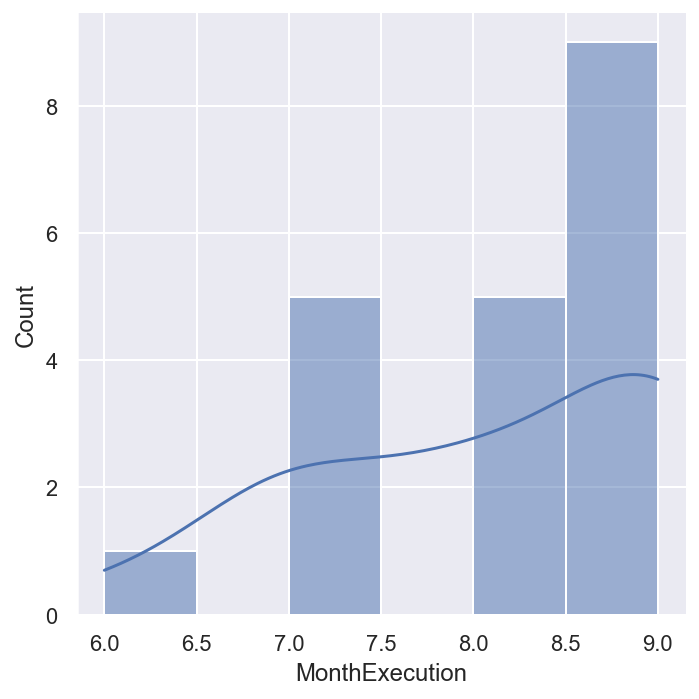

### Questions 1 & 2
1. What % of the Accused were Executed? 
2. On average, how long from accusation till execution? 

### 1. Execution Rate of the Accused 17.65%

In [ ]:
#calculating % with the counts defined previously
Percent = df['MonthExecution'].sum() / df['MonthAccusation'].sum(
) * 100
print(Percent)

### 2. Avg Length of time between accusation and execution 173 days

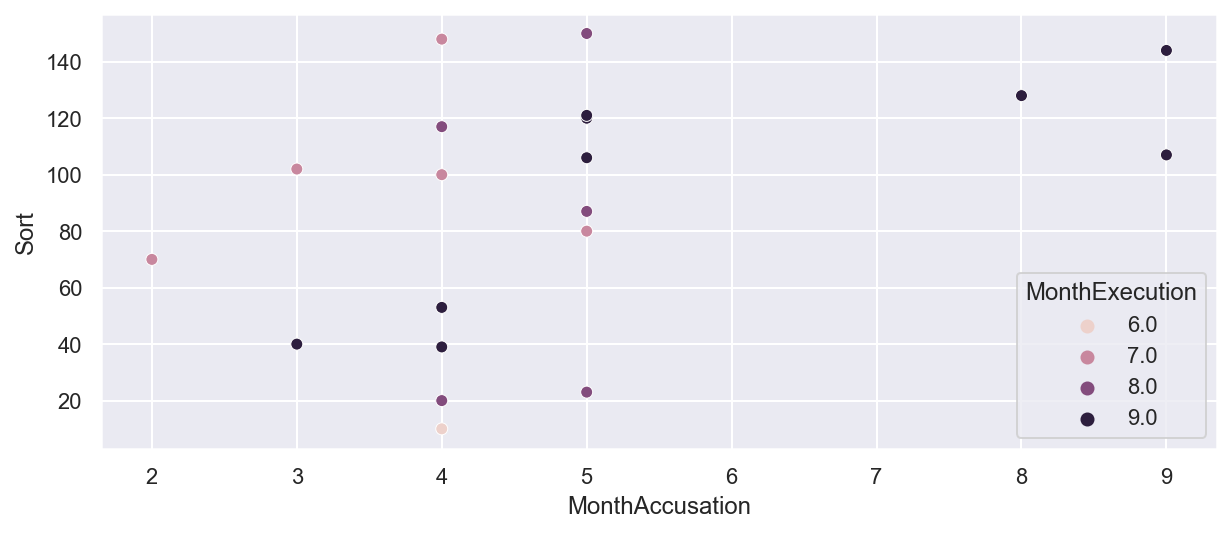

In [24]:
#find accused dates and execution dates
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

date1 = pd.Series(pd.date_range('1696-1-1 12:00:00', periods=7, freq='M')) #define 1st variable
date2 = pd.Series(pd.date_range('1696-9-30 21:45:00', periods=7, freq='W'))#define 2nd variable
df = pd.DataFrame(dict(Accused_date=date1, Execution_date=date2))#define new columns

print(df)

         Accused_date      Execution_date
0 1696-01-31 12:00:00 1696-09-30 21:45:00
1 1696-02-29 12:00:00 1696-10-07 21:45:00
2 1696-03-31 12:00:00 1696-10-14 21:45:00
3 1696-04-30 12:00:00 1696-10-21 21:45:00
4 1696-05-31 12:00:00 1696-10-28 21:45:00
5 1696-06-30 12:00:00 1696-11-04 21:45:00
6 1696-07-31 12:00:00 1696-11-11 21:45:00


In [25]:
#Calculate the number of days between Accused date and execution date
df['diff_days'] = df['Execution_date'] - df['Accused_date']
df['diff_days'] = df['diff_days'] / np.timedelta64(1, 'D')

print(df)

         Accused_date      Execution_date  diff_days
0 1696-01-31 12:00:00 1696-09-30 21:45:00  243.40625
1 1696-02-29 12:00:00 1696-10-07 21:45:00  221.40625
2 1696-03-31 12:00:00 1696-10-14 21:45:00  197.40625
3 1696-04-30 12:00:00 1696-10-21 21:45:00  174.40625
4 1696-05-31 12:00:00 1696-10-28 21:45:00  150.40625
5 1696-06-30 12:00:00 1696-11-04 21:45:00  127.40625
6 1696-07-31 12:00:00 1696-11-11 21:45:00  103.40625


# Towns Data Set 
Contains twenty-four columns recording each town with one or more accusations of witch craft.  
Each cell lists the month of an accusation represented by its corresponding month number eg. 1 = Jan. 
It also holds a bin Column containing the range of months of accusations starting with 1 (Jan 1962) to 12 (Dec 1692) This set contains numerous NaNs to be converted to a 0, representing no records of accusations exist for that month, in that town.

# Observations
The cluster of accusations engulfed 24 towns & villages with the most popping up in Andover, Salem Village and Salem Town. The average month to be accused was June, the average month to be executed should you be found guilty, was January. It is important to note, the lack of death penalty did not necessarily mean the accused was found innocent. Time served and payments of fines were handed out as per the judgements of the court.

## Distribution  
The frequency of outbreak is concentrated in 2 main sectors: Andover, and Salem (Salem Village , and Salem Town) 

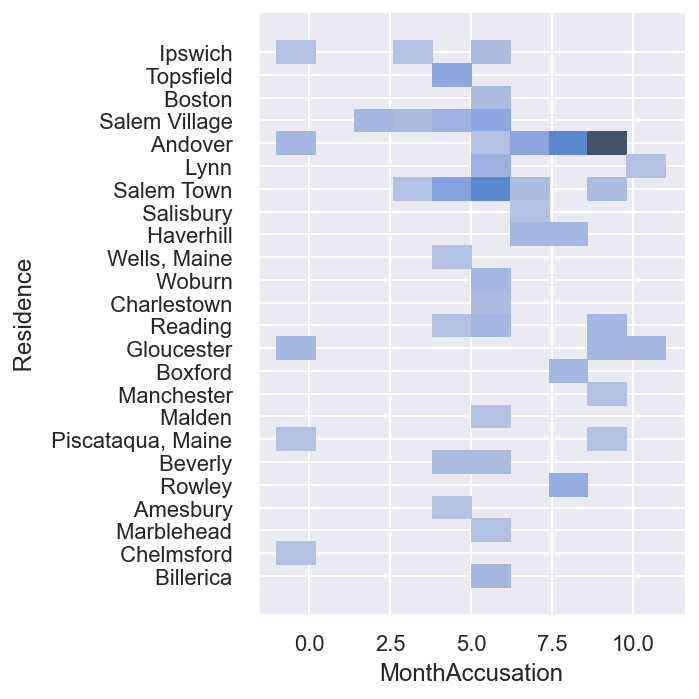

<b> Note,</b> the histogram follows a bimodal pattern, suggesting we are looking at two mirroring outbreaks. The distribution plot above, shows us two major sectors driving the outbreak. 

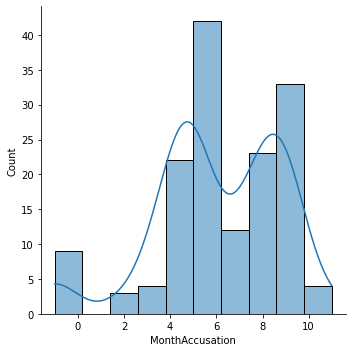

### Questions
3. Which village had the most, the least accused?
4. Which village had the most, the least executed?

## Andover 
had the most accused (45), Malden and 6 other towns had one accusation each.
## Salem Town 
had the most executions (4), Wells, Maine and 9 others had one execution each.


## Each town ranked by number of Accused

In [21]:
df=pd.read_csv('./Accused-Witches-Data-Set.csv', sep=',') 
df.groupby(' Residence ').size().sort_values(ascending=False) #To find out how many accused came from each town

 Residence 
 Andover               45
 Salem Town            24
 Salem Village         15
 Gloucester             9
 Reading                7
 Topsfield              6
 Haverhill              6
 Lynn                   5
 Rowley                 5
 Ipswich                4
 Beverly                4
 Boxford                3
 Billerica              3
 Woburn                 3
 Charlestown            2
 Boston                 2
 Piscataqua, Maine      2
 Wells, Maine           1
 Salisbury              1
 Amesbury               1
 Marblehead             1
 Manchester             1
 Chelmsford             1
 Malden                 1
dtype: int64

## Each Town ranked by Number of Executions

In [23]:
df2 = df.groupby([' Residence ', 'MonthExecution']).size().reset_index(name='count').sort_values('count', ascending=False) 
print (df2)

         Residence   MonthExecution  count
8       Salem Town              9.0      4
2          Andover              9.0      2
7       Salem Town              8.0      2
9    Salem Village              7.0      2
0         Amesbury              7.0      1
1          Andover              8.0      1
3          Ipswich              7.0      1
4       Marblehead              9.0      1
5           Rowley              9.0      1
6       Salem Town              6.0      1
10   Salem Village              8.0      1
11       Topsfield              7.0      1
12       Topsfield              9.0      1
13    Wells, Maine              8.0      1


In [82]:
#quick and easy value counts
#df=pd.read_csv('./Accused-Witches-Data-Set.csv', sep=',')
#df.value_counts(subset=None, normalize=False, sort=True, ascending=False)

### Cleaning

### Replace all NaNs with 0

In [32]:
df = pd.read_csv('./Towns-Data-Set.csv', sep=',') 
df[' Amesbury '] = df[' Amesbury '].fillna(0) 
df['Beverly'] = df['Beverly'].fillna(0) 
df['Billerica'] = df['Billerica'].fillna(0) 
df['Boston'] = df['Boston'].fillna(0) 
df['Boxford'] = df['Boxford'].fillna(0) 
df['Chelmsford'] = df['Chelmsford'].fillna(0) 
df['Charlestown'] = df['Charlestown'].fillna(0) 
df['Marblehead'] = df['Marblehead'].fillna(0) 
df['Piscataqua, Maine'] = df['Piscataqua, Maine'].fillna(0) 
df['Salisbury'] = df['Salisbury'].fillna(0) 
df['Wells, Maine'] = df['Wells, Maine'].fillna(0) 
df['Woburn'] = df['Woburn'].fillna(0) 


In [83]:
# Confirming all NaNs have been replaced
#df.head()

### Measures of Tendancies

In [34]:
#Avg month of accusation vs avg month of execution
df.mean()


Bin                  5.923077
 Amesbury            0.088889
Andover              7.666667
Beverly              0.422222
Billerica            0.333333
Boston               0.222222
Boxford              0.533333
Charlestown          0.222222
Chelmsford          -0.022222
Gloucester           6.333333
Haverhill            7.500000
Ipswich              3.000000
Lynn                 6.200000
Malden               5.000000
Manchester           9.000000
Marblehead           0.111111
Piscataqua, Maine    0.177778
Reading              6.571429
Rowley               8.000000
Salem Town           5.173913
Salem Village        3.937500
Salisbury            0.133333
Topsfield            4.000000
Wells, Maine         0.088889
Woburn               0.333333
dtype: float64

In [35]:
df.median()

Bin                  6.0
 Amesbury            0.0
Andover              8.0
Beverly              0.0
Billerica            0.0
Boston               0.0
Boxford              0.0
Charlestown          0.0
Chelmsford           0.0
Gloucester           9.0
Haverhill            7.5
Ipswich              4.0
Lynn                 5.0
Malden               5.0
Manchester           9.0
Marblehead           0.0
Piscataqua, Maine    0.0
Reading              5.0
Rowley               8.0
Salem Town           5.0
Salem Village        4.0
Salisbury            0.0
Topsfield            4.0
Wells, Maine         0.0
Woburn               0.0
dtype: float64

In [36]:
df.std()

Bin                  4.030334
 Amesbury            0.596285
Andover              2.504541
Beverly              1.389717
Billerica            1.261312
Boston               1.042045
Boxford              2.018100
Charlestown          1.042045
Chelmsford           0.149071
Gloucester           5.567764
Haverhill            0.547723
Ipswich              2.828427
Lynn                 2.167948
Malden                    NaN
Manchester                NaN
Marblehead           0.745356
Piscataqua, Maine    1.353260
Reading              2.299068
Rowley               0.000000
Salem Town           1.527094
Salem Village        1.181454
Salisbury            0.894427
Topsfield            0.000000
Wells, Maine         0.596285
Woburn               1.261312
dtype: float64

# Community Sentiments

### As gleaned by Tax Records

Tax records list whether the tax payer lodged a ballet either for, or against keeping Rev. Parris on, after the disastrous 10 months of witchysteria.  

NoS paid the least amount of taxes across the board, and Anti-Paris households paid a nose more than Pro-Paris households.


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

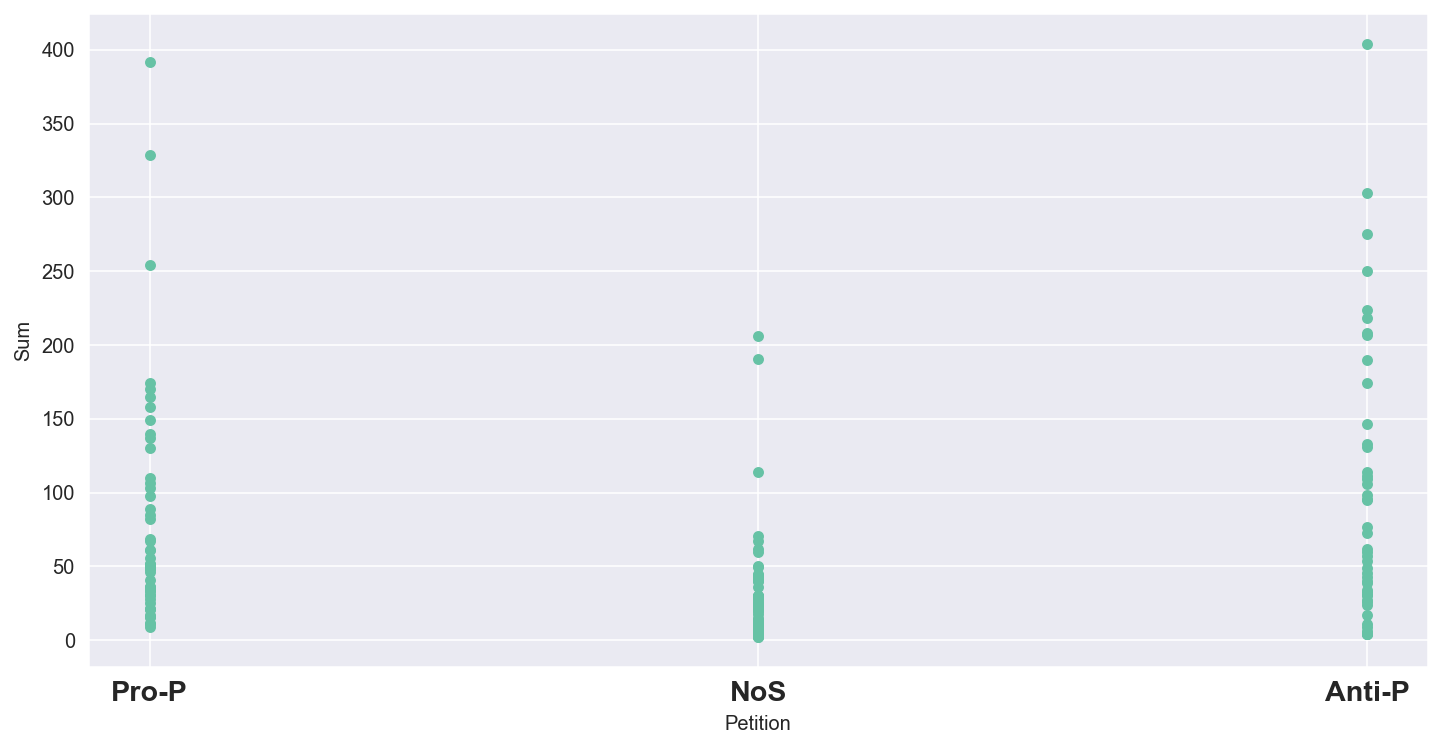

In [87]:
#import libraries
from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger

matplotlib_axes_logger.setLevel('ERROR')

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [12, 6]
%config InlineBackend.figure_format = 'retina' #nicer for the eyes
#load data
TaxData = pd.read_csv(
    '/Users/sareenah/Desktop/Salem/Tax-Comparison-Data-Set.csv',
    header='infer',
    index_col=0,
    squeeze=True).fillna(0)  #replaces any NaNs with 0's
# build graph
TaxData.plot(kind="scatter", x='Petition', y='Sum')
#styling
plt.xticks(horizontalalignment='center', fontweight='bold', fontsize='x-large')

## Committee List Data Set
Contains a total of 31 individual Salem Committee members who held office during Samuel Paris' reign as Minister. Records include member votes for years of 1685-1698.
It provides their name, Social information such as name or whether they were a Church Member or Householder (Meaning not affiliated with the Church in question), and whether they supported or opposed Samuel Paris or had no side in the matter.

In comparing the <b>Sentiment by Tax payer</b> chart above, with the the <b>Sentiment by Voter chart</b> below: <i>We see a complete inverse in sentiment.</i> Where NoS's filled the majority of ballots and Pro-Parris groups submitted slightly more votes than did the Anti-Parris crowd.


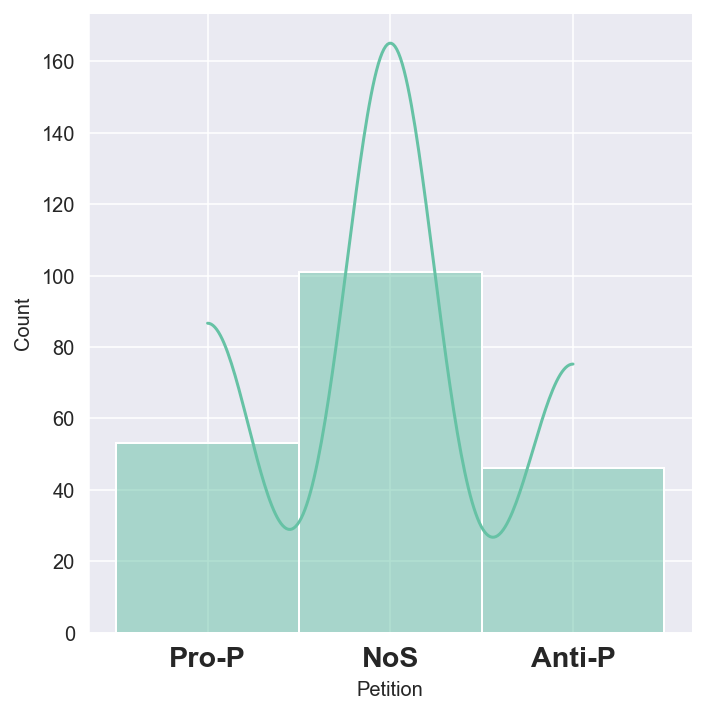

## Observations
### Social Information
Of 31 Committee Members the majority (16) self described themselves as Householders rather than Church Members.
### Voting Trends
The top votes regarding Parris is NoS = No Side with 101 total votes.
Of those who did have a side, Pro-Paris had the highest total over all.

## The  First Surprise of this analysis:
Came with the examination of villager voting record, and the realization Samuel Parris prevailed in the vote despite the vast majority of voters self identifying as non-church goers.  This was especially surprising as the historic record reveals a high level of animosity between the Puritan Church and surrounding villages.  The church was waging a war against Quakers, Catholics and Atheists at this time. That the Puritan Reverend would prevail under such circumstances with votes un-afilliated with his own church is intriguing.

<b>There were a total of 137 votes cast</b>

<b>Results were in favor of Rev, Parris</b>
<ul>Pro-P     53</ul>
<ul>NoS       44</ul>
<ul>Anti-P    40</ul>

<b>Affiliation of voters</b>
<ul>Non-Church    103</ul>
<ul>Church         34</ul>

## Questions
##### 5. Is there a correlation between amount of taxes paid and support of Paris? No.
The lower tax rates paid = the least amount of engagement, giving neither support or opposition. Those who supported Parris paid a nose less than those who opposed him.

([0, 1, 2], [Text(0, 0, 'Pro-P'), Text(1, 0, 'NoS'), Text(2, 0, 'Anti-P')])

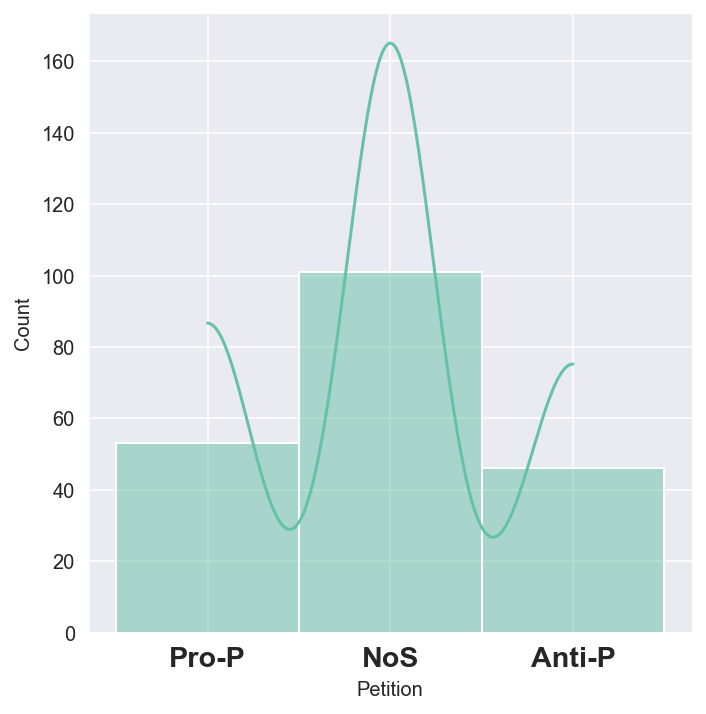

In [91]:
#loading colour palette
sns.color_palette("Set2", as_cmap=True)
import pandas as pd

taxData = pd.read_csv(
    '/Users/sareenah/Desktop/Salem/Tax-Comparison-Data-Set.csv',
    header='infer',
    index_col=0,
    squeeze=True).fillna(0)
# specifying number of bins
num_bins = 3
#build chart
sns.displot(taxData, x="Petition", kde=True)

#styling
plt.xticks(horizontalalignment='center', fontweight='bold', fontsize='x-large')

### Replace all NaNs with 0

In [37]:
df = pd.read_csv('./Committee-List-Data-Set.csv', sep=',')
df['1686'] = df['1686'].fillna(0)
df['1687'] = df['1687'].fillna(0)
df['1688'] = df['1688'].fillna(0)
df['1689'] = df['1689'].fillna(0)
df['1690'] = df['1690'].fillna(0)
df['1691'] = df['1691'].fillna(0)
df['1692'] = df['1692'].fillna(0)
df['1693'] = df['1693'].fillna(0)
df['1694'] = df['1694'].fillna(0)
df['1695'] = df['1695'].fillna(0)
df['1696'] = df['1696'].fillna(0)
df['1697'] = df['1697'].fillna(0)
df['1698'] = df['1698'].fillna(0)

In [38]:
df.head()

,Committee Members,Petition,Social,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,Sort
0,"Putnam, Lt. John [Senr]",Pro-P,Church Member,1685.0,1686.0,1687.0,1688.0,1689.0,0.0,0.0,0.0,0.0,0.0,0.0,1696.0,0.0,0.0,1
1,"Walcott, Jonathan",Pro-P,Householder,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,"Buxton, John",Anti-P,Householder,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1697.0,0.0,3
3,"Sibley, William",NoS,Householder,1685.0,1686.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,"Putnam, Thomas Junr",Pro-P,Church Member,1685.0,1686.0,1687.0,0.0,0.0,0.0,0.0,0.0,0.0,1694.0,1695.0,1696.0,1697.0,1698.0,5


In [39]:
df['Social'].describe()

count              31
unique              3
top       Householder
freq               16
Name: Social, dtype: object

In [40]:
df['Social'].max()

'Householder'

In [41]:
df['Social'].min()

'Church Member'

In [42]:
df['Petition'].describe()

count         31
unique         3
top       Anti-P
freq          15
Name: Petition, dtype: object

In [43]:
df['Petition'].count()

31

In [44]:
df['Petition'].max()

'Pro-P'

In [45]:
df['Petition'].min()

'Anti-P'

### Question 6.
#### Is there a correlation between Church affiliation and support or opposition to Paris? 
Yes, but NOT in the way I had anticipated.  Support for Parris was less likely to come from his own parish, than from a non church going member. A Church member was much more likely to oppose him than support him.

### Question 7.
## Pro-Paris Profile
The pro-Paris faction was in the majority with 105 total votes.
Surprisingly, those who supported Paris were split down the middle regarding Church Membership.
Of his supporters, 53 self described themselves as Church goers and 52 as householders.
54 Men, and 53 women supported Paris. 


In [92]:
sns.set_theme(color_codes=True)

In [46]:
df = pd.read_csv('./Pro-Parris-Social-Data-Set.csv', sep=',')

In [94]:
import pandas as pd

data = pd.read_csv('./Pro-Parris-Social-Data-Set.csv', sep=',')

In [95]:
data = pd.read_csv('./Anti-Parris-Social-Data-Set.csv', sep=',')

### Support for the Puritan Minister came from male 'outsiders', or non church members.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Young men. 16 years old'),
  Text(1, 0, 'Householder'),
  Text(2, 0, '[Church] Member'),
  Text(3, 0, 'Free-Holder')])

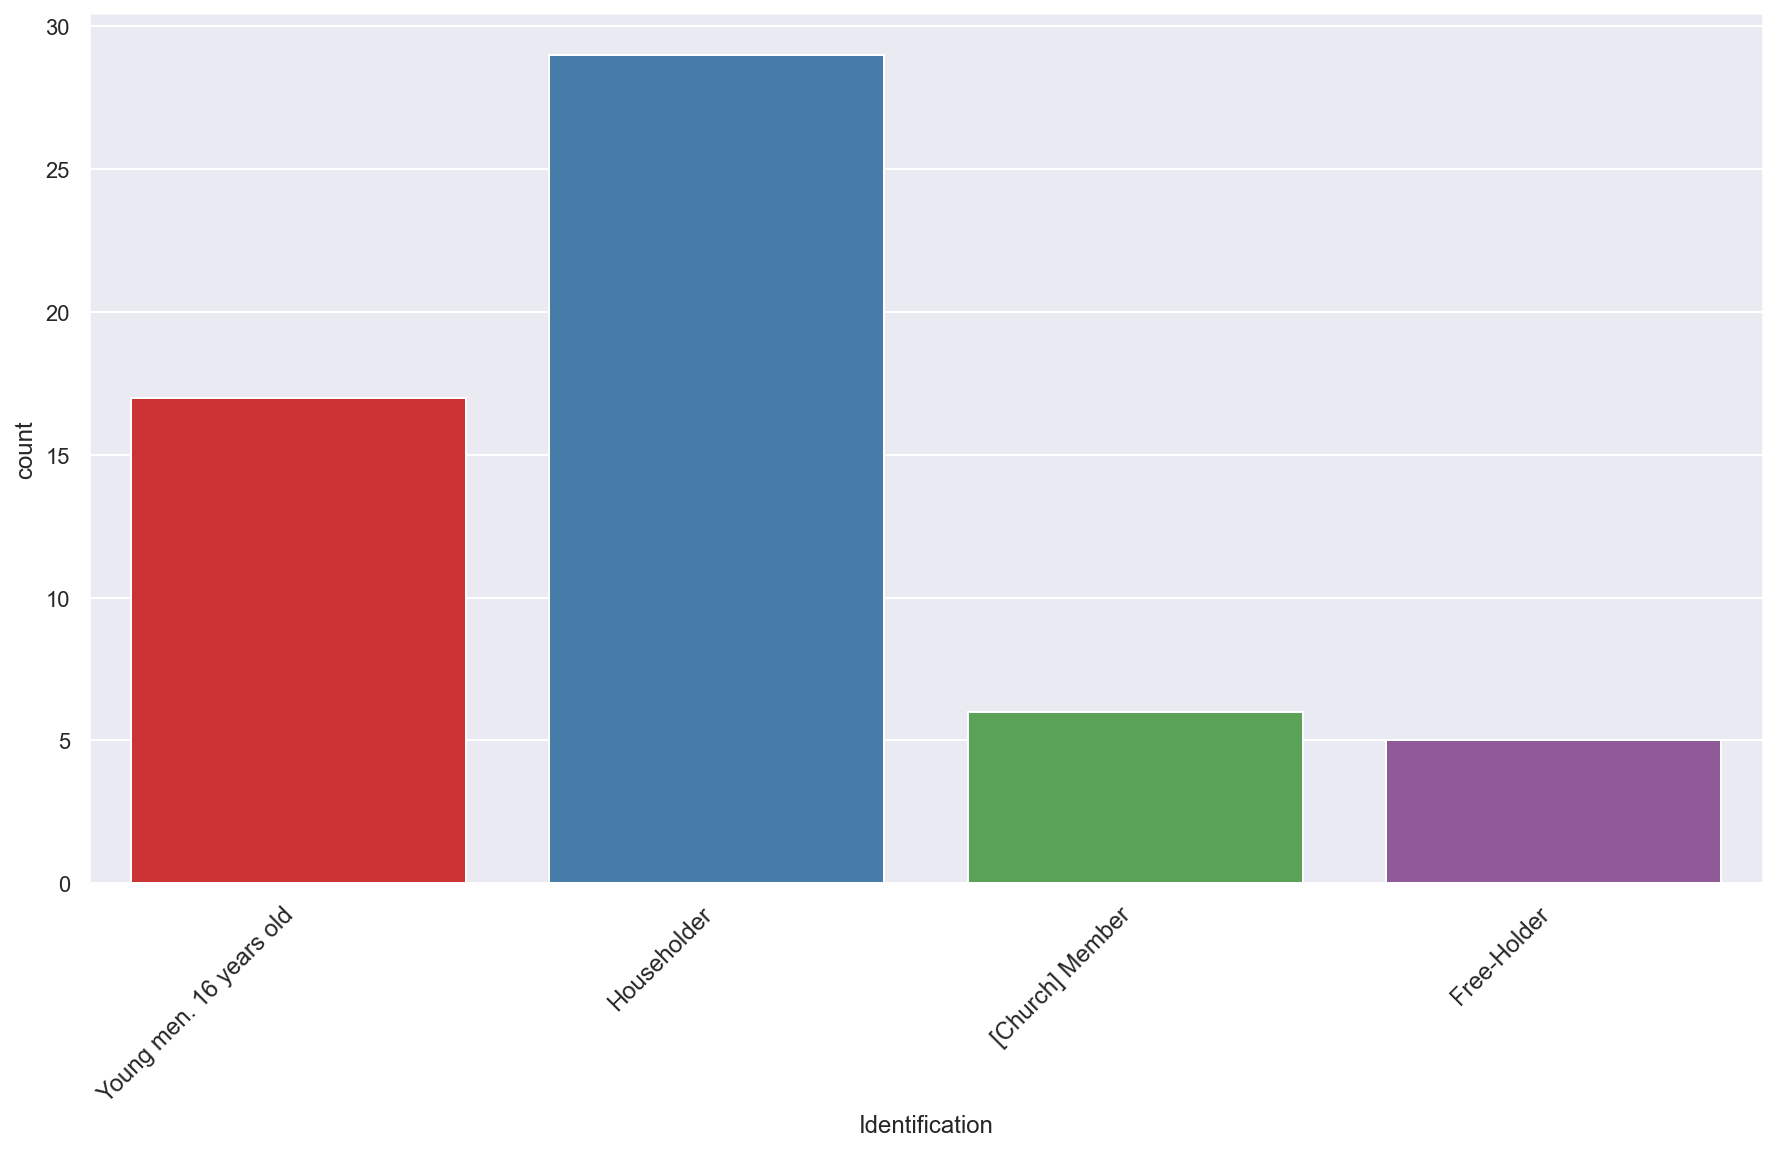

In [104]:
plt.figure(figsize=(15, 8))

chart = sns.countplot(data=data[data['Sex'] == 'M'],
                      x='Identification',
                      palette='Set1')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)

### While there is less detail on the female members of the pro-Paris camp,  the trend of non-member support for Parris continues to outstrip member support.

### Gender Make up of Pro-Parris are nearly split down the middle.  54 Male  and 51 female .

In [47]:
df=pd.read_csv('./Pro-Parris-Social-Data-Set.csv', sep=',') 
df.groupby('Sex').size().sort_values(ascending=False) 

Sex
M    54
F    51
dtype: int64

### Social Make up of Pro-Paris sentiment is  evenly divided between 53 Householders, vs 52 church-members

In [48]:
df=pd.read_csv('./Pro-Parris-Social-Data-Set.csv', sep=',') 
df.groupby('Identification').size().sort_values(ascending=False) 

Identification
Householder      53
Church-Member    52
dtype: int64

In [49]:
print(antiParis.head())

               Name           Identification Sex  Sort
0    Porter, Joseph  Young men. 16 years old   M     1
1      Porter, Sam:  Young men. 16 years old   M     2
2     Preston, Jno.  Young men. 16 years old   M     3
3     Porter, Nath.  Young men. 16 years old   M     4
4  Swinnerton, Ben:  Young men. 16 years old   M     5


## Anti-Parris Profile
The anti-Paris group included 84 individuals.
They were more likely to be male and were less likely to attend church. 

(array([0, 1]), [Text(0, 0, '[Church] Member'), Text(1, 0, 'Non-Member')])

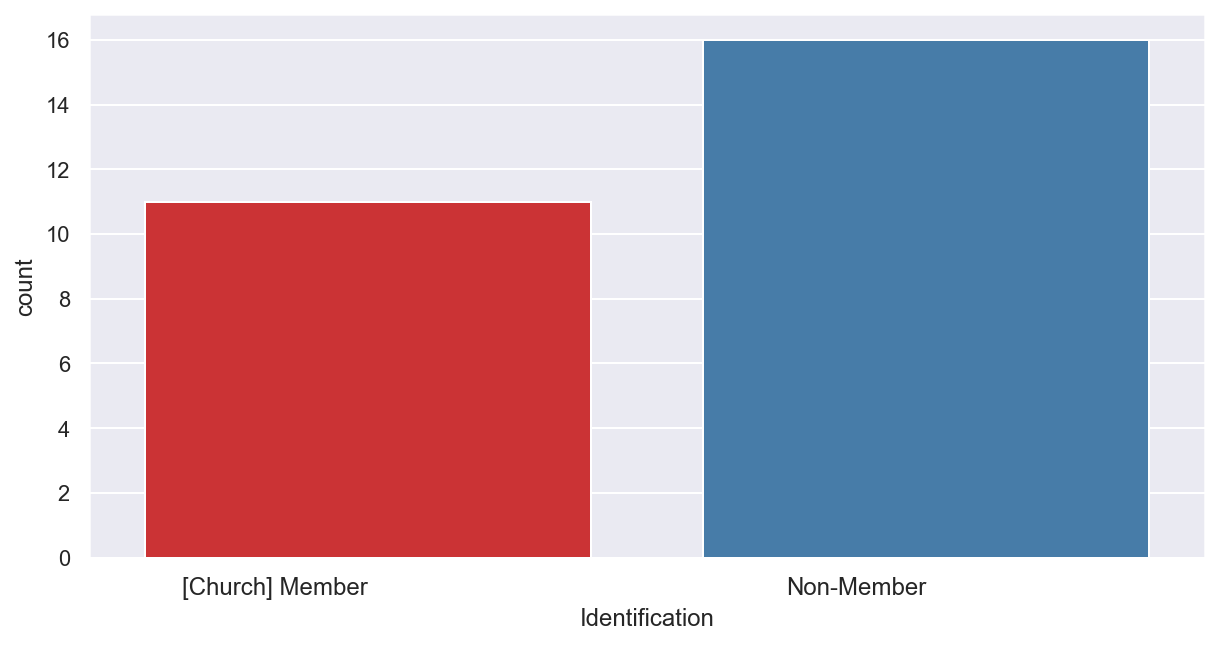

In [107]:
plt.figure(figsize=(10, 5))

chart = sns.countplot(data=data[data['Sex'] == 'F'],
                      x='Identification',
                      palette='Set1')

plt.xticks(horizontalalignment='right', fontweight='light', fontsize='medium')

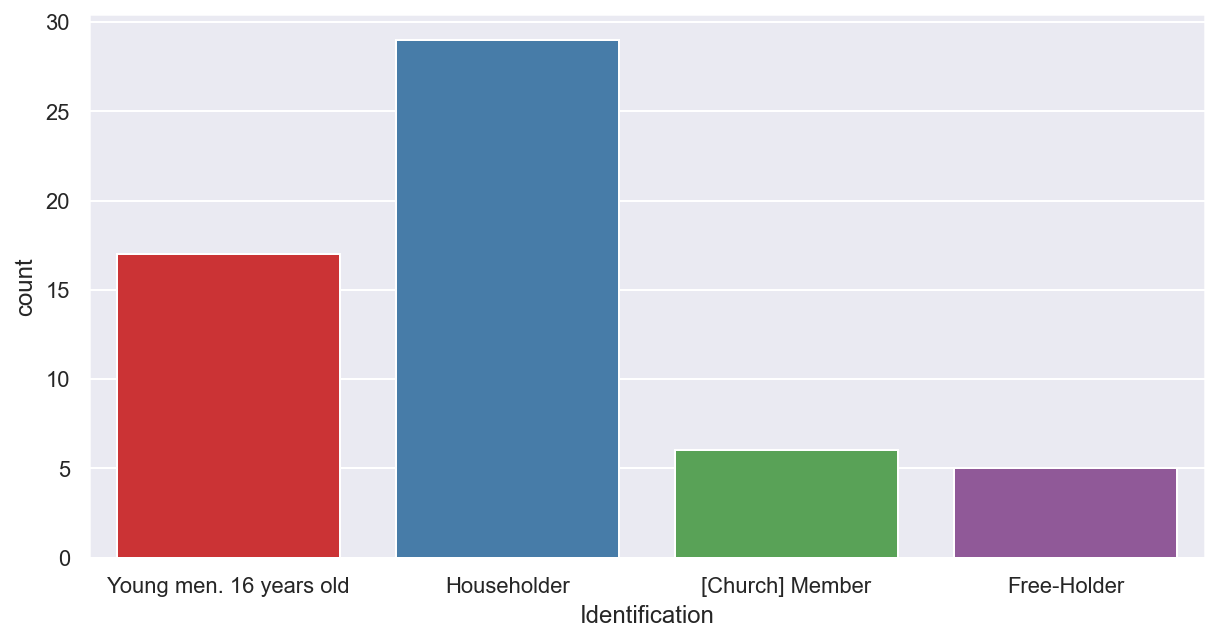

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

chart = sns.countplot(data=data[data['Sex'] == 'M'],
                      x='Identification',
                      palette='Set1')

In [50]:
df=pd.read_csv('./Anti-Parris-Social-Data-Set.csv', sep=',') 
df.groupby('Sex').size().sort_values(ascending=False) 

Sex
M    57
F    27
dtype: int64

In [51]:
df=pd.read_csv('./Anti-Parris-Social-Data-Set.csv', sep=',') 
df.groupby('Identification').size().sort_values(ascending=False) 

Identification
Householder                29
Young men. 16 years old    17
[Church] Member            17
Non-Member                 16
Free-Holder                 5
dtype: int64

### Tax Comparison Data Set
Name, Pro or Anti Paris, year and taxes paid in shillings.
Need to clean up NaNs

In [52]:
df=pd.read_csv('./Tax-Comparison-Data-Set.csv', sep=',')

### Replace all NaNs with 0

In [53]:
df['1681'] = df['1681'].fillna(0)
df['1690'] = df['1690'].fillna(0)
df['1694'] = df['1694'].fillna(0)
df['1695'] = df['1695'].fillna(0)
df['1697'] = df['1697'].fillna(0)
df['1700'] = df['1700'].fillna(0)

In [109]:
#df.head()

In [110]:
#df.min()
# returns the household paying the least tax on record, anti-P sentiment

In [111]:
#df.max()
# returns the household paying the most tax on record, pro-P sentiment

In [112]:
#df.describe()
#we can see a dramatic drop in taxes paid in the years of Paris's employment, increasing again once he leaves

In [113]:
#df.shape #rows, columns

### Votes by tax payers over time by Paris sentiment and Payment amount (in shillings)

In [59]:
df=pd.read_csv('./Tax-Comparison-Data-Set.csv', sep=',', header=0)

In [114]:
#quick and easy value counts
#df.value_counts(subset=None, normalize=False, sort=True, ascending=False)

In [61]:
# import regex module
import re

# removing null values 
df.dropna(inplace = True)

# describe Tax Payer 
desc = df['Name'].describe()

# display
desc

count                      36
unique                     36
top       Fuller, Thomas senr
freq                        1
Name: Name, dtype: object

In [115]:
#print(village.head())

In [63]:
len(village) #finding out how many people signed petitions

137

In [64]:
village['Petition'].value_counts()# more Pro-P than Anti-P, No side is a significant size

Pro-P     53
NoS       44
Anti-P    40
Name: Petition, dtype: int64

In [65]:
village['Church to 1696'].value_counts()# interesting, only 34 of P supporters were even part of his church

Non-Church    103
Church         34
Name: Church to 1696, dtype: int64

# Statistical Analysis

In [ ]:
import statistics as st

# Measures of Central Tendencies

### Accusations

In [70]:
village['Petition'].value_counts().mode() #0 Anti-P, 1 NoS, 2 Pro-P


0    40
1    44
2    53
dtype: int64

In [71]:
village['Petition'].value_counts().mean() #mean number of total votes for each group

45.666666666666664

In [72]:
village['Petition'].value_counts().median() #median number of total votes for each group

44.0

In [118]:
village['Petition'].value_counts().std() #standard deviation for number of total votes for each group

6.658328118479393

# Visualization Figures

In [119]:
import matplotlib.pyplot as plt

In [120]:
# specifying number of bins
num_bins = 10

In [121]:
num_bins

10

# Accused
our histogram has a bi-modal shape, indicating we are looking at two groups withing the data

<Figure size 1080x576 with 0 Axes>

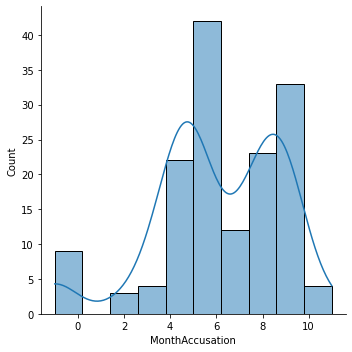

<Figure size 1080x576 with 0 Axes>

In [77]:
sns.displot(data=accused, x='MonthAccusation', kde=True)
plt.figure(figsize=(15,8))

In [ ]:
# To test this, I added another column 'Residence' 

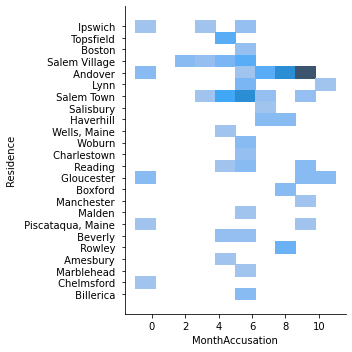

In [78]:
sns.displot(data=accused, x='MonthAccusation', y=' Residence ') #By adding another column to sns.displot we're able to create a a bivariate plot. 

<AxesSubplot:xlabel='MonthAccusation', ylabel='Sort'>

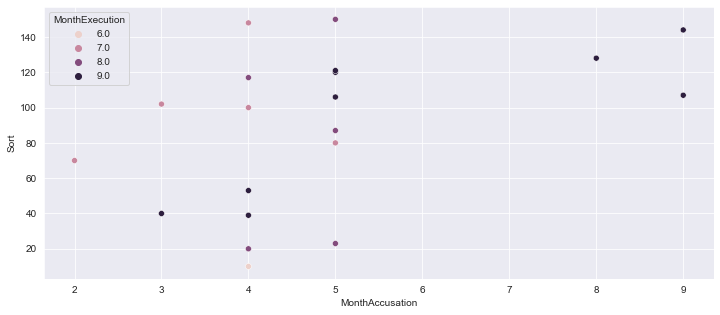

In [79]:
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.figure(figsize=(12,5))
sns.scatterplot(data=accused, x='MonthAccusation', y='Sort', hue='MonthExecution')

# Hypothesis Testing
Null Hypothesis is That Church Goers are more apt to support Parris

# Linear Regression of Parris Sentiment
from tax comparison data
<ul>1 = ProP</ul>
<ul>0 = AntiP</ul>
<ul>-1 = NoS</ul>


In [5]:
#load libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
#define arrays x 1 = pro, -1 = nos, 0 = anti

In [3]:
x=np.array([1,-1,-1,1,0,-1,-1,-1,0,1,0,0,-1,0,1,-1,0,0,-1,0,0,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,1,0,0,-1,-1,-1,-1,-1,1,1,0,-1,-1,-1,-1,-1,-1,1,1,-1,1,1,1,-1,-1,1,-1,1,-1,0,-1,0,-1,1,0,0,-1,-1,1,1,0,0,-1,-1,1,-1,-1,-1,0,-1,-1,-1,0,-1,-1,1,-1,-1,-1,0,-1,1,0,-1,-1,-1,0,0,-1,0,-1,0,-1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,-1,-1,1,-1,0,-1,1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,-1,-1,-1,-1,1,-1,0,-1,0,0,0,-1,0,-1,-1,-1,-1,0,0,1,1,1,1,-1,-1,1,1,1,-1,-1,1,1,1,1,1,1,0,-1,-1,-1,-1,-1,-1])
y=np.array([21,22.5,24,31,303.25,4,22.5,6,4,34,106,4,3.25,54,51.5,61.5,45.5,11,30,207,9,12,11,3,68.5,13,40.5,4.25,4,3.25,8,10,44,4,35,6.5,3,5,5,11,6,6,5,254,33.5,95,32.5,8,43,7,67.5,5,21,137,208.5,26,27.5,30.25,70.5,10,4,36,21.5,9,35,165,16,24,29.25,41,7.5,106.5,4,174,12,109,21,49,39,98.5,8.5,6,56,36,59.5,275.25,49.5,45,158,5,24,36,76.5,30,30,4,6,30,5,25.5,24,6,5,31,40,17,24,10,20.5,10,34,111,7,4,3,133,50,250,96,404,17,49.5,26,73,50,36,110,329,149,46,98,170,82,174,218,392,206.25,30,140,9.75,131,190.5,51,57,224,22,2.25,4,14,4.75,30,10.5,5,114,61,62,27.5,4,43.5,22,4,12,4,4,60,49,190,40,20,114,3,5,13,3,31,43,31,130,52,9,12,5,67.5,61,49,6,10,28,103,89,85,48,15.5,146.75,7,18,40,2.5,4,15])

In [6]:
#define function
linreg = LinearRegression()

In [7]:
#re-shape array for best fit
x =x.reshape(-1,1)

In [8]:
linreg.fit(x,y)

LinearRegression()

In [10]:
y_pred = linreg.predict(x)

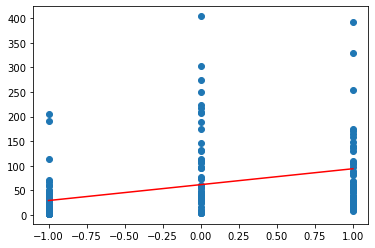

In [11]:
plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

In [12]:
print(linreg.coef_)

[32.31590399]


In [13]:
print(linreg.intercept_)

61.75831695676585


In [14]:
#Y= mx + c
#y= 32.31 +61.75

T-Testing to get Pvalue for Parris Sentiment among Tax paying villagers based on church membership

In [15]:
import scipy #for t-testing

In [16]:
from scipy.stats import ttest_1samp, ttest_ind

In [21]:
scipy.stats.ttest_ind(x, y, axis=0, equal_var=True, nan_policy='propagate',  alternative='two-sided')

Ttest_indResult(statistic=array([-10.72230598]), pvalue=array([9.80831674e-24]))

# Hypothesis REJECTED!

In [ ]:
The pvalue of 9.8083 signifies the results of my experiment are too random to prove any significance between church membership and support for Parris.

# ANSWERS

#### 1. What % of the Accused were Executed? 
17%
#### 2. On average, how long from accusation till execution? 
173 days
#### 3. Which village had the most, the least accused?
<p><b>The Most:</b> Andover 45, Salem Town 24, Salem Village 15</p>
<p><b>The Least:</b> Manchester, Chelmsford, Malden and four others recorded 1 accusation each.</p>
#### 4. Which village had the most, the least Executed?
<p><b>The Most Executed: </b>Salem Town 4, Andover 2, Salem Town 2</p>
<p><b>The Least Executed:</b>
Amesbury,                   
Andover,           
Ipswich,           
and six others each saw one execution on record for the events in question.</p>

5. Is there a correlation between Church affiliation and support or opposition to Paris?
6. Is there a correlation between amount of taxes paid and support of Paris?

#### 7. What is the profile of a Paris supporter?  Opposer?
Church membership was not a driving factor for supporters of Samuel Paris, neither was gender as the vote was evenly spread between female and male voters. However, to the opposition gender and church membership does appear to be factors.  The majority of opposition came from young men, with no affiliation to the church.